OVERVIEW

SyriaTel, a prominent player in the telecommunications industry, is currently grappling with customer retention issues. Customer churn, the scenario where clients terminate their services, poses a substantial threat as it not only diminishes revenue but also tarnishes the company's standing in a fiercely competitive market. Uncovering trends and forecasting customer churn holds the key to gaining actionable intelligence for preemptively tackling challenges and deploying retention strategies effectively.

PROBLEM STATEMENT

The primary challenge at hand involves crafting a predictive framework capable of precisely pinpointing customers at the verge of churning from SyriaTel's offerings. By harnessing historical customer data and pertinent variables, the aim is to construct a classifier adept at distinguishing between customers inclined to maintain their subscriptions and those inclined to churn imminently.
Objectives:

1.Prediction: Forge a robust binary classification model for precise customer churn prediction.

2.Uncover Key Drivers: Identify and scrutinize the pivotal factors influencing customer churn.

3.Strategic Retention Initiatives: Furnish actionable intelligence to facilitate the implementation of targeted retention tactics for vulnerable customers.

4.Revenue Safeguarding: Mitigate revenue erosion by curtailing the exodus of customers discontinuing services.

DATA UNDERSTANDING


Customer churn prediction in SyriaTel involves analyzing data to predict when customers are likely to leave the company. 

The dataset used for this analysis contains information on customers over 9 months

1. SyriaTel has a churn rate of approximately 15% for customers with less than 245 days of tenure.

2. Various machine learning models like Decision Tree, Logistic Regression, KNN, Random Forest, and Gradient Boost were tested, with the Gradient Boost model performing best with a recall score of 0.81.

3. To reduce churn, SyriaTel needs to decrease it by 7.49% to reach an adequate level.

4. Strategies to address churn include offering discounts in specific area codes, improving customer service quality, evaluating pricing structures, focusing on retention in high-churn states, and enhancing voicemail plan value proposition.

5.The dataset used for this analysis includes customer data and towers/complaints database information.


kaggle datasets download -d becksddf/churn-in-telecoms-dataset

BELOW

The code snippet imports essential libraries for data analysis and machine learning tasks. It includes:

pandas: for data manipulation and analysis.

matplotlib.pyplot: for creating visualizations.

seaborn: for statistical data visualization.

train_test_split, GridSearchCV: for splitting data into training and testing sets, and hyperparameter tuning.

LogisticRegression: for logistic regression modeling.

accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix: for evaluating model performance metrics.

StandardScaler: for standardizing features by removing the mean and scaling to unit variance.

RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier: for implementing ensemble methods like Random Forest, decision tree-based models, and k-nearest neighbors classification.

In [1]:
# Importing necessary libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

C:\Users\phyllis\AppData\Local\Temp\ipykernel_3236\2344918171.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#importing the dataset

syria_Tel_Customer_data = pd.read_csv("syria tel customer churn.csv")

In [3]:
syria_Tel_Customer_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
syria_Tel_Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
syria_Tel_Customer_data= syria_Tel_Customer_data.replace(['yes', 'no'], ['1', '0'])
syria_Tel_Customer_data[['international plan', 'voice mail plan']] = syria_Tel_Customer_data[['international plan', 'voice mail plan']].astype(int).astype(bool)

In [6]:
syria_Tel_Customer_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# Data Preprocessing
# Handle missing values if any
syria_Tel_Customer_data.dropna(inplace=True)

In [8]:
# Check the column names in your dataset
print(syria_Tel_Customer_data.columns)


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [9]:
syria_Tel_Customer_data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

A visual representation of the churn distribution in the 'syria_Tel_Customer_data' dataset using a countplot with annotations. 


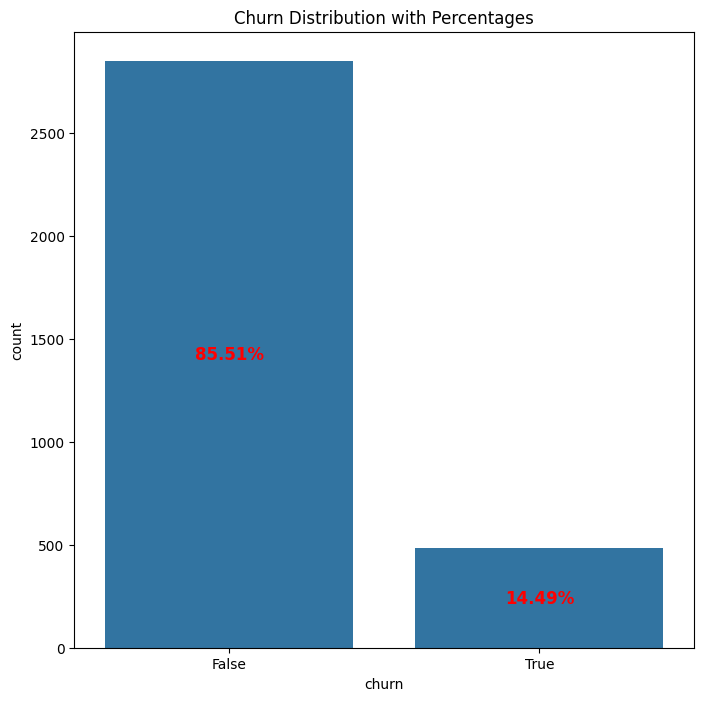

In [10]:
# Creating a countplot with annotations
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.countplot(x='churn', data=syria_Tel_Customer_data)

# Calculating the percentage for each category
total_count = len(syria_Tel_Customer_data)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total_count:.2f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='red', fontsize=12, weight='bold')



plt.title('Churn Distribution with Percentages')
plt.show()


In [11]:
syria_Tel_Customer_data['total calls'] = syria_Tel_Customer_data['total day calls'] + syria_Tel_Customer_data['total eve calls'] + syria_Tel_Customer_data['total night calls'] + syria_Tel_Customer_data['total intl calls'] + syria_Tel_Customer_data['customer service calls']
syria_Tel_Customer_data['total minutes'] = syria_Tel_Customer_data['total day minutes'] + syria_Tel_Customer_data['total eve minutes'] + syria_Tel_Customer_data['total night minutes'] + syria_Tel_Customer_data['total intl minutes']

print(syria_Tel_Customer_data['total calls'].describe(), syria_Tel_Customer_data['total minutes'].describe(), sep='\n\n')

count    3333.00000
mean      306.69997
std        34.44939
min       194.00000
25%       284.00000
50%       307.00000
75%       330.00000
max       418.00000
Name: total calls, dtype: float64

count    3333.000000
mean      591.864776
std        89.954251
min       284.300000
25%       531.500000
50%       593.600000
75%       652.400000
max       885.000000
Name: total minutes, dtype: float64


The code provided calculates various statistics based on the SyriaTel customer data. 

In [12]:
calls_by_state = syria_Tel_Customer_data.groupby('state')['total calls'].sum().sort_values(ascending=False)
minutes_by_state = syria_Tel_Customer_data.groupby('state')['total minutes'].sum().sort_values(ascending=False)

avg_minutes_by_state = syria_Tel_Customer_data.groupby('state')['total minutes'].mean().sort_values(ascending=False)
avg_calls_by_state = syria_Tel_Customer_data.groupby('state')['total calls'].mean().sort_values(ascending=False)
records_by_state = syria_Tel_Customer_data.groupby('state')['churn'].count().sort_values(ascending=False)

print(avg_minutes_by_state.head())
print(avg_calls_by_state.head())
print(records_by_state.head())

state
IN    619.323944
NJ    611.707353
KS    608.884286
MA    608.644615
TN    606.994340
Name: total minutes, dtype: float64
state
GA    318.351852
FL    315.809524
ND    314.258065
ID    312.931507
NC    312.911765
Name: total calls, dtype: float64
state
WV    106
MN     84
NY     83
AL     80
OR     78
Name: churn, dtype: int64


This code segment effectively visualizes and compares call and minute statistics across states, providing insights into variations in call volumes, average call durations, and customer distribution within SyriaTel's customer base.

Most calls: WV
Least calls: CA
Most minutes: WV
Least minutes: CA


Text(0, 0.5, 'total records')

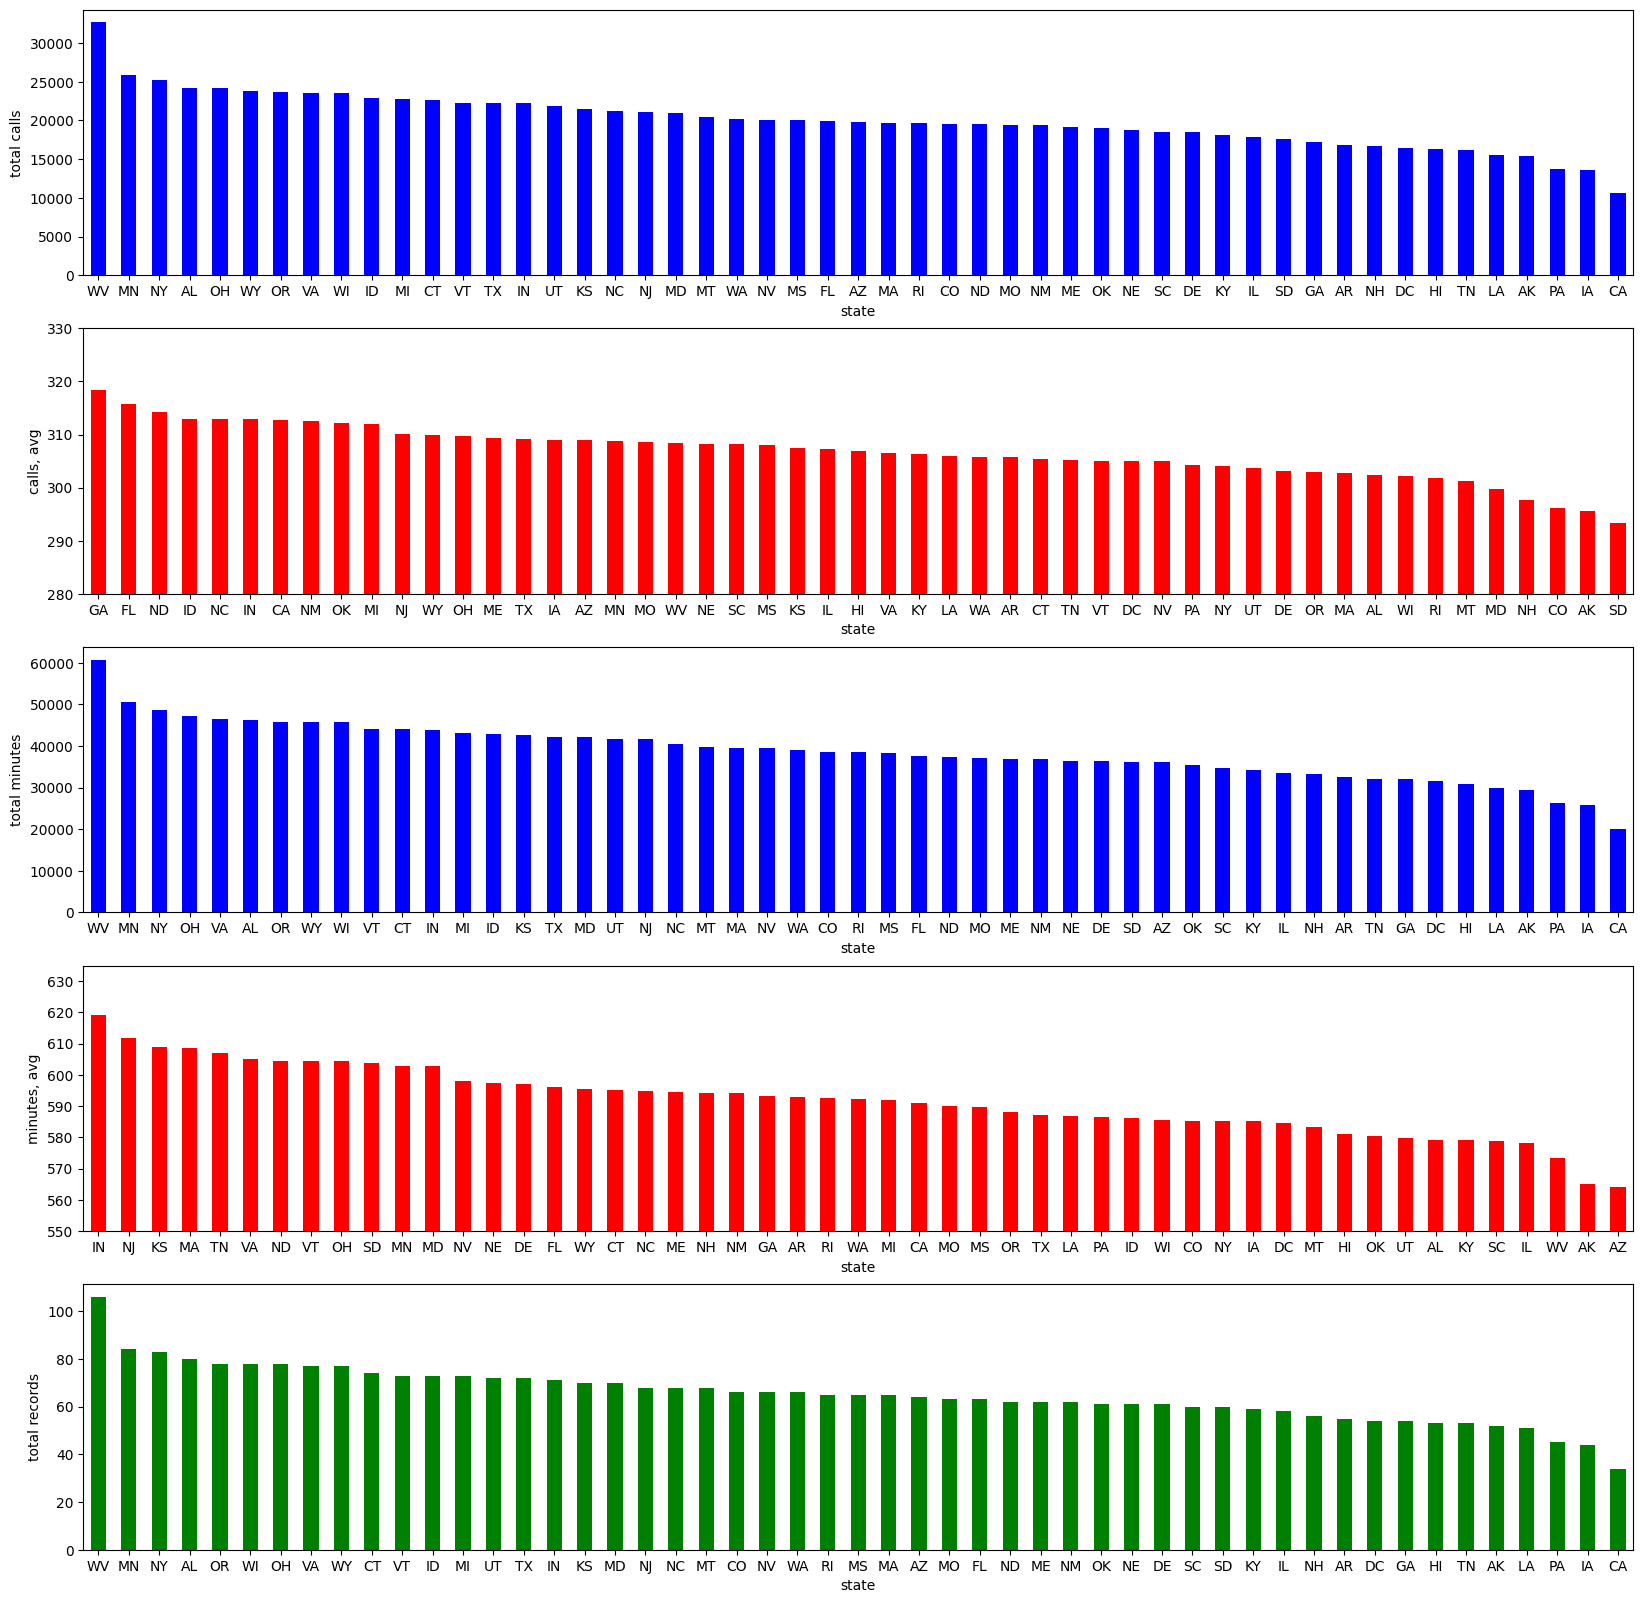

In [13]:
most_calls = calls_by_state.idxmax()
least_calls = calls_by_state.idxmin()
print('Most calls:', most_calls)
print('Least calls:', least_calls)

most_minutes = minutes_by_state.idxmax()
least_minutes = minutes_by_state.idxmin()
print('Most minutes:', most_minutes)
print('Least minutes:', least_minutes)

fig, ax = plt.subplots(5, 1, figsize=(20,20))
sns.set_palette("muted", 8)

calls_by_state.plot(kind='bar', ax=ax[0], rot=0, color='blue')
ax[0].set_ylabel('total calls')
avg_calls_by_state.plot(kind='bar', ax=ax[1], rot=0, color='red')
ax[1].set_ylabel('calls, avg')
ax[1].set_ylim(280, 330)
minutes_by_state.plot(kind='bar', ax=ax[2], rot=0, color='blue')
ax[2].set_ylabel('total minutes')
avg_minutes_by_state.plot(kind='bar', ax=ax[3], rot=0, color='red')
ax[3].set_ylabel('minutes, avg')
ax[3].set_ylim(550, 635)
records_by_state.plot(kind='bar', ax=ax[4], rot=0, color='green')
ax[4].set_ylabel('total records')

In [14]:
analysis = syria_Tel_Customer_data[['total intl calls', 'international plan']].groupby('international plan').describe().T
analysis['All'] = syria_Tel_Customer_data['total intl calls'].describe().values
analysis.T

total intl calls                                          \
                              count      mean       std  min  25%  50%  75%   
international plan                                                            
False                        3010.0  4.465449  2.442486  0.0  3.0  4.0  6.0   
True                          323.0  4.609907  2.629768  1.0  3.0  4.0  6.0   
All                          3333.0  4.479448  2.461214  0.0  3.0  4.0  6.0   

                          
                     max  
international plan        
False               19.0  
True                20.0  
All                 20.0

Below the point-biserial correlation coefficient is a useful measure when analyzing the relationship between a dichotomous variable and a continuous variable, providing insights into how these variables are related in a dataset.

In [15]:
from scipy.stats import pointbiserialr
print('Point-biserial correlation coefficient of international plan and total intl calls:', pointbiserialr(syria_Tel_Customer_data['international plan'], syria_Tel_Customer_data['total intl calls']))

Point-biserial correlation coefficient of international plan and total intl calls: SignificanceResult(statistic=0.01736634323160388, pvalue=0.3162008163735118)


In [16]:
syria_Tel_Customer_data[['international plan', 'voice mail plan']] = syria_Tel_Customer_data[['international plan', 'voice mail plan']].replace(['yes', 'no'], ['1', '0']).astype(int)



 visualization of the distribution of 'account length' values in the 'syria_Tel_Customer_data' dataset. The countplot displays the frequency of different account lengths present in the dataset.

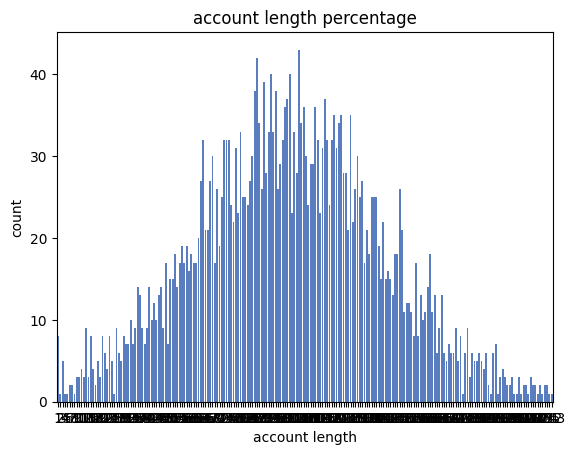

In [17]:
sns.countplot(x='account length', data=syria_Tel_Customer_data)
plt.title('account length percentage')
plt.show()


In [18]:

# Model Building
# Split data into features and target variable
X = syria_Tel_Customer_data.drop('account length', axis=1)
y = syria_Tel_Customer_data['account length']



In the code below we have the visualization of the correlation between numeric features in the dataset, providing insights into how these features are related to each other using a heatmap representation. The color intensity and annotations in the heatmap help in understanding the strength and direction of correlations between different numeric variables.

[Text(0.5, 1.0, 'correlation matrix of numeric features')]

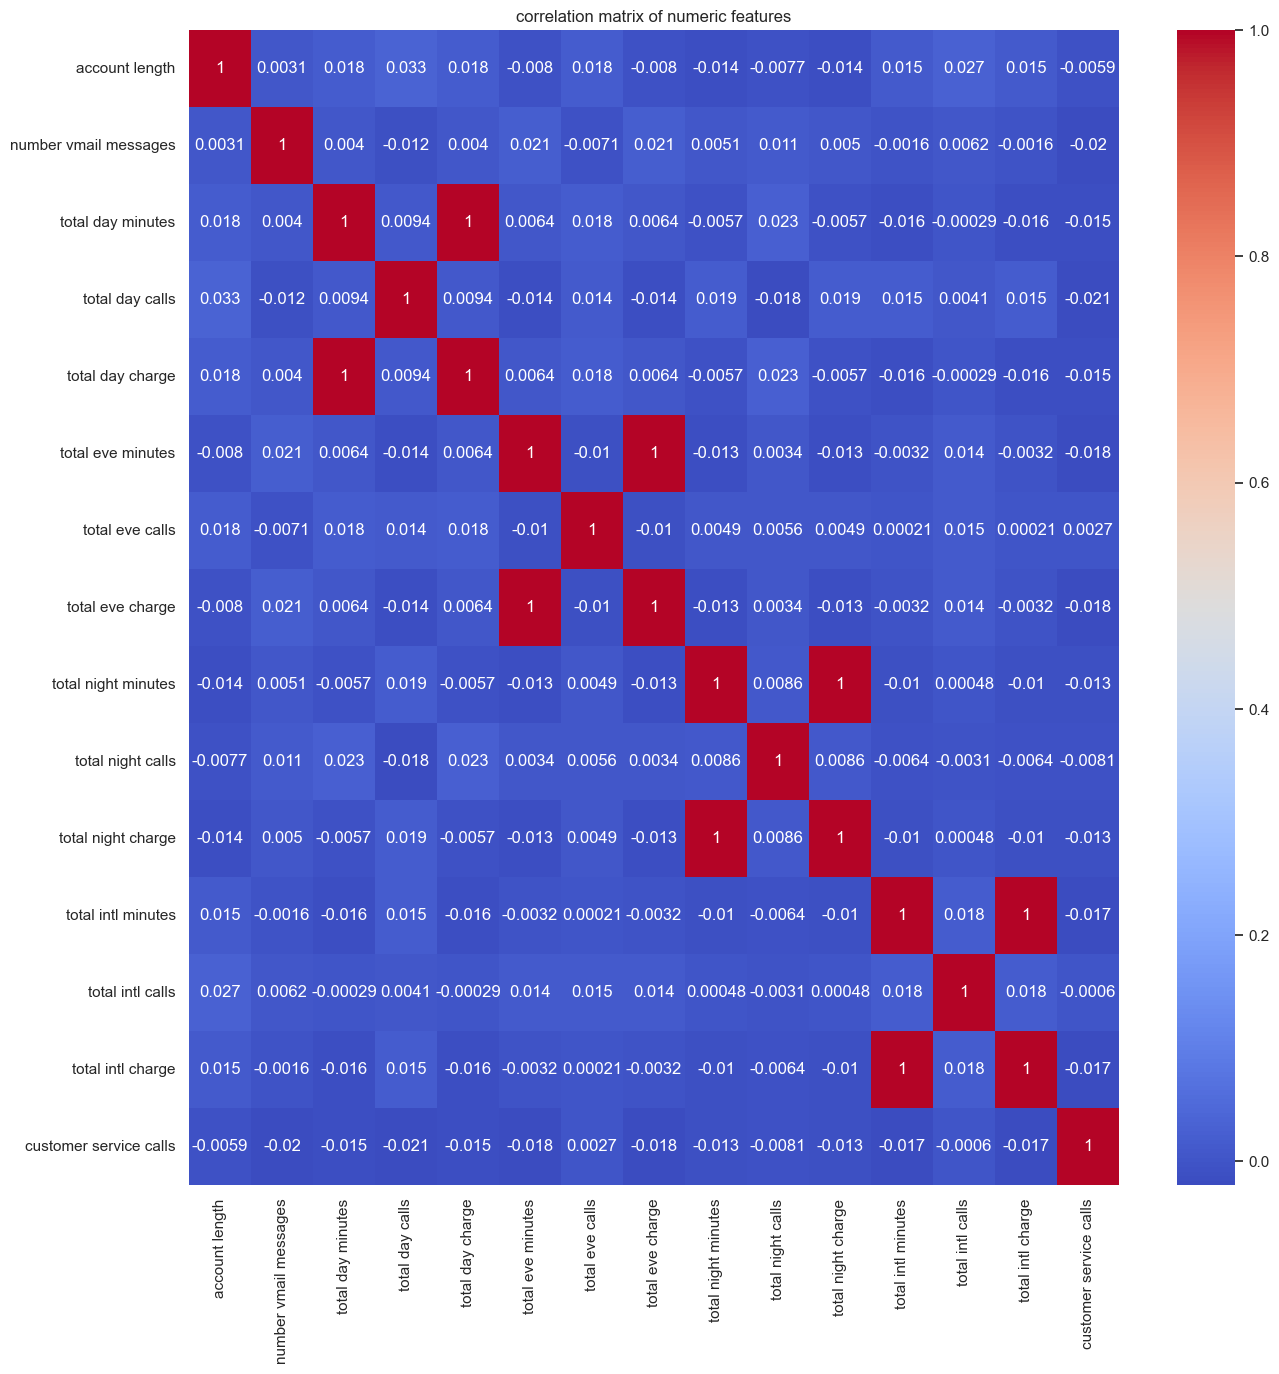

In [19]:
num = ['account length', 'number vmail messages','total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge','total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'] # numeric features
cr = syria_Tel_Customer_data[num].corr(method='spearman') # calculate correlation matrix

plt.figure(figsize=(15,15))
sns.set(font_scale=1)
sns.heatmap(cr, annot=True,cmap='coolwarm').set(title='correlation matrix of numeric features')

In [20]:
syria_Tel_Customer_data = syria_Tel_Customer_data.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
syria_Tel_Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   int32  
 5   voice mail plan         3333 non-null   int32  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

 The following code prepares the data for machine learning modeling by creating new features, separating features and target variable, and splitting the data into training and validation sets for model training and evaluation

In [21]:
from sklearn.model_selection import train_test_split

# df['total day minutes ^ 4'] = df['total day minutes'] ** 4
X = syria_Tel_Customer_data.drop('churn', axis=1)
y = syria_Tel_Customer_data['churn']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state=44)

In [22]:
#Identify columns with non-numeric data types:
non_numeric_columns = syria_Tel_Customer_data.select_dtypes(exclude=['int64', 'float64']).columns
print(non_numeric_columns)

Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'churn'],
      dtype='object')


ONE-HOT ENCODING

By applying one-hot encoding, each unique category in the categorical columns is converted into a binary feature, allowing machine learning algorithms to interpret and utilize categorical data effectively during model training and prediction processes.

In [23]:
#Encode categorical variables using one-hot encoding:

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(syria_Tel_Customer_data[non_numeric_columns])

In [24]:
#Separate features (X) and target variable (y):

X = syria_Tel_Customer_data.drop(columns=['churn'])  # Assuming 'churn' is the target variable
y = syria_Tel_Customer_data['churn']

In [25]:
#Split data into training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

By splitting the data into separate training and testing sets, this process allows for model training on one portion of the data and evaluation on another, enabling assessment of model performance on unseen data to gauge its generalization capabilities. see above

In [26]:

print(X_train.columns)


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls',
       'total calls', 'total minutes'],
      dtype='object')


In [27]:
# Assuming X_train contains both numerical and categorical columns
numerical_features = ['account length', 'number vmail messages','total day minutes', 'total day calls',
        'total eve minutes', 'total eve calls',
       'total night minutes',  'total intl charge','total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls']    # List of numerical feature column names
categorical_features = ['state', 'phone number','international plan', 'total night charge','total night charge','total eve charge','total day charge','voice mail plan',
       'churn']  # List of categorical feature column names




By standardizing the features, this process ensures that all features have a mean of 0 and a standard deviation of 1, which can improve model performance, especially for algorithms sensitive to feature scaling or when dealing with features on different scales. see below


In [33]:


syria_Tel_Customer_data = pd.get_dummies(syria_Tel_Customer_data, columns=['state', 'area code'], dtype=int)
syria_Tel_Customer_data.head()

,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,382-4657,0,1,25,265.1,110,197.4,99,244.7,...,0,0,0,0,0,0,0,0,1,0
1,107,371-7191,0,1,26,161.6,123,195.5,103,254.4,...,0,0,0,0,0,0,0,0,1,0
2,137,358-1921,0,0,0,243.4,114,121.2,110,162.6,...,0,0,0,0,0,0,0,0,1,0
3,84,375-9999,1,0,0,299.4,71,61.9,88,196.9,...,0,0,0,0,0,0,0,1,0,0
4,75,330-6626,1,0,0,166.7,113,148.3,122,186.9,...,0,0,0,0,0,0,0,0,1,0


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_valid_st = scaler.transform(X_valid)

ValueError: could not convert string to float: 'OR'

 The performance of the MLP Classifier on the validation set and provides key classification metrics like F1 score, accuracy, and recall for assessing the model's effectiveness in making predictions.

In [56]:
from sklearn.neural_network import MLPClassifier

NeuralNet = MLPClassifier(random_state=5, max_iter=1000)
NeuralNet.fit(X_train_st, y_train)
y_pred = NeuralNet.predict(X_valid_st)

df_scores = pd.DataFrame({'Neural network': [f1_score(y_pred, y_valid), accuracy_score(y_pred, y_valid), recall_score(y_pred, y_valid)]}, index=['f1_score', 'accuracy_score', 'recall_score'])
df_scores.T

NameError: name 'X_train_st' is not defined

Confusion matrix, enables the assessment of classification model performance through a detailed breakdown of predicted and actual class labels, aiding in understanding the model's accuracy, precision, recall, and other key metrics

In [64]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_pred, y_valid)

NameError: name 'y_pred' is not defined

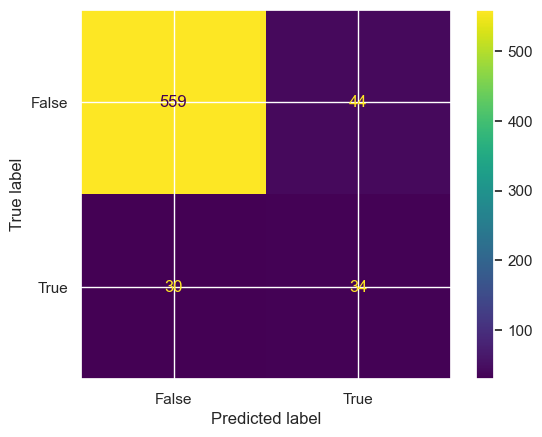

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

RANDOM FOREST CLASSIFIER

We can efficiently optimize the performance of the classifier by fine-tuning its hyperparameters, leading to improved accuracy and robustness in classification tasks for our data, Syria Tel Customer Churn

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 30, 40]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 30, 40],
                         'n_estimators': [100, 200, 300]})

In [ ]:
results_df_grid_search= pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)
results_df_grid_search

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,1.226995,0.184034,0.025227,0.005437,20,200,"{'max_depth': 20, 'n_estimators': 200}",0.951311,0.941839,0.939962,0.934334,0.947467,0.942983,0.005911,1
6,0.737675,0.213497,0.016257,0.003240,40,100,"{'max_depth': 40, 'n_estimators': 100}",0.956929,0.943715,0.936210,0.928705,0.943715,0.941855,0.009369,2
2,1.673637,0.034568,0.038077,0.005586,20,300,"{'max_depth': 20, 'n_estimators': 300}",0.945693,0.936210,0.941839,0.934334,0.945591,0.940733,0.004708,3
8,1.666371,0.042657,0.035288,0.003001,40,300,"{'max_depth': 40, 'n_estimators': 300}",0.938202,0.938086,0.939962,0.938086,0.947467,0.940361,0.003624,4
5,1.811939,0.244677,0.036389,0.003834,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.945693,0.938086,0.941839,0.932458,0.943715,0.940358,0.004680,5
7,1.478161,0.150436,0.028496,0.005056,40,200,"{'max_depth': 40, 'n_estimators': 200}",0.945693,0.934334,0.943715,0.932458,0.943715,0.939983,0.005459,6
3,0.567136,0.007807,0.011817,0.002349,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.936330,0.936210,0.938086,0.930582,0.945591,0.937360,0.004829,7
4,1.104223,0.015644,0.026771,0.005229,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.934457,0.941839,0.936210,0.934334,0.938086,0.936985,0.002785,8
0,0.651230,0.108858,0.013735,0.002496,20,100,"{'max_depth': 20, 'n_estimators': 100}",0.947566,0.924953,0.943715,0.924953,0.939962,0.936230,0.009516,9


In [ ]:
print(len(y_pred), len(y_valid))

667 5


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def get_ytrue_ypred(cm):
    y_true = []
    y_pred = []
    
    for true_idx in range(cm.shape[0]):
        for pred_idx in range(cm.shape[1]):
            cnt = cm[true_idx, pred_idx]
            y_true.extend([true_idx] * cnt)
            y_pred.extend([pred_idx] * cnt)
    
    return np.array(y_true), np.array(y_pred)

# Example usage:
cm = np.array([[99, 1, 2], [3, 55, 4], [5, 6, 17]])
y_true, y_pred = get_ytrue_ypred(cm)

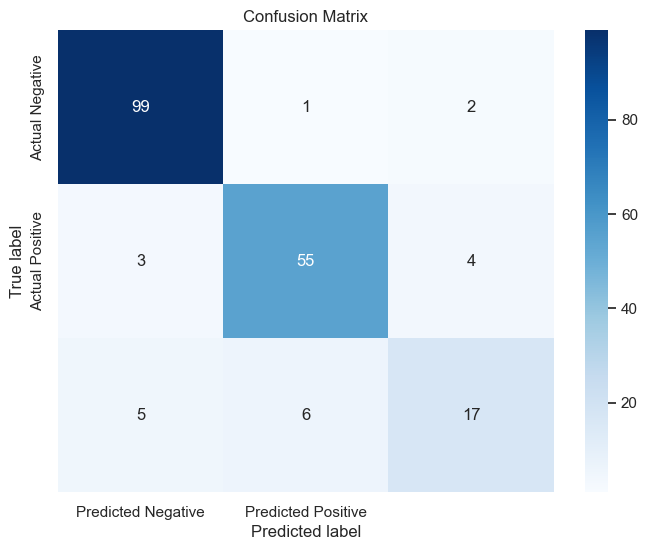

In [ ]:
# Calculate the confusion matrix with aligned y_pred and y_valid
#cm = confusion_matrix(y_valid[:len(y_pred)], y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression

The reported accuracy of 0.85 for a logistic regression classifier on the test set indicates that the model achieved an accuracy of 85% in predicting the target variable on unseen data.

In [ ]:
# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\Users\phyllis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predict on the test set and calculate accuracy
y_pred = logreg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy of logistic regression classifier on test set: {accuracy:.2f}')


Accuracy of logistic regression classifier on test set: 0.85


Overall, achieving an accuracy of 0.85 with a logistic regression classifier signifies a strong predictive performance on the test set, indicating that the model correctly classified 85% of the instances

In [ ]:
conf_matrix = confusion_matrix(y_train, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[2211   50]
 [ 356   49]]


The confusion matrix is a valuable tool in evaluating classification models, providing insights into how well the model performs in terms of correct and incorrect predictions for each class.

True Positives (TP): 49 - These are the cases where the model correctly predicted the positive class.

True Negatives (TN): 2211 - These are the cases where the model correctly predicted the negative class.

False Positives (FP): 50 - These are the cases where the model incorrectly predicted the positive class.

False Negatives (FN): 356 - These are the cases where the model incorrectly predicted the negative class.

Validation Curve

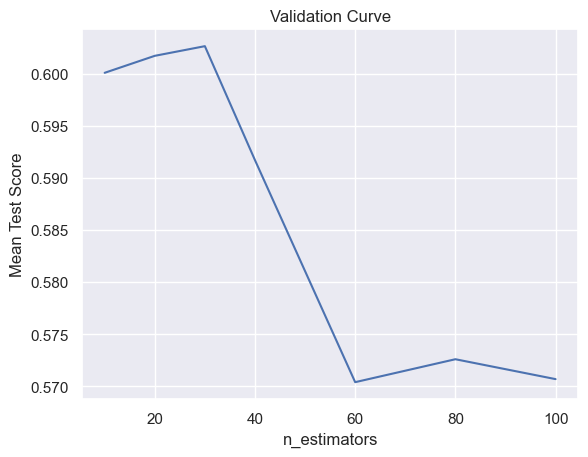

In [ ]:
import matplotlib.pyplot as plt

def plot_valid_curve(data, parameter, ax):
    param_values = data.cv_results_['param_' + parameter]
    mean_scores = data.cv_results_['mean_test_score']
    
    ax.plot(param_values, mean_scores)
    ax.set_xlabel(parameter)
    ax.set_ylabel('Mean Test Score')
    ax.set_title('Validation Curve')

# Now you can call the function with the defined logic
fig, ax = plt.subplots()
plot_valid_curve(baggingLogReg_grid, 'n_estimators', ax)
plt.show()

In [ ]:
# Assuming you have trained your model and made predictions stored in y_pred
from sklearn.metrics import accuracy_score

# Assuming you have split your data into training and testing sets (X_train, X_test, y_train, y_test)
# and trained your model (model.fit(X_train, y_train))
y_pred = model.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8477119279819955


The reported accuracy of 0.8477119279819955 for a logistic regression model indicates that the model achieved an accuracy of approximately 84.77% in predicting the target variable on the test set. 

Accuracy measures the overall correctness of predictions, precision focuses on the relevance of positive predictions, recall evaluates the ability to find all positive samples, and the F1 score combines precision and recall into a single metric that balances both aspects. see below;

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have predictions stored in y_pred and true labels in y_test
# Calculate accuracy
accuracy = accuracy_score(y_train,y_pred)

# Calculate precision
precision = precision_score(y_train, y_pred)

# Calculate recall
recall = recall_score(y_train, y_pred)

# Calculate F1-score
f1 = f1_score(y_train, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8477119279819955
Precision: 0.494949494949495
Recall: 0.12098765432098765
F1 Score: 0.19444444444444445


DECISION TREE

This code demonstrates how to create, train, visualize, and evaluate a decision tree classifier using scikit-learn

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

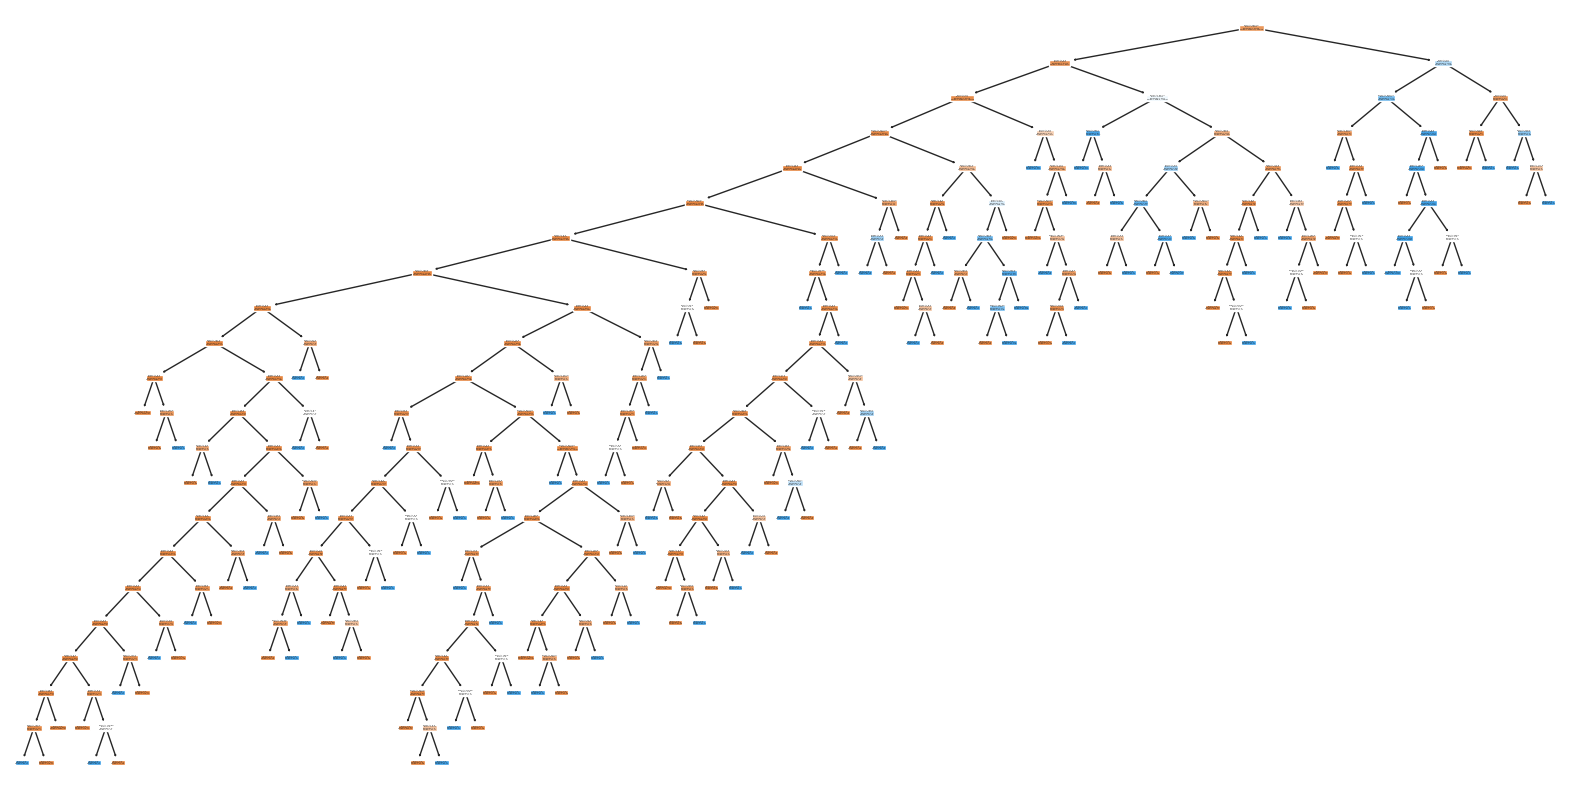

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()

In [ ]:

# Step 7: Evaluate the performance of your classifier using testing data
y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
df_scores['Knn'] = [0.32214765100671144, 0.8788968824940048, 0.20869565217391303]
df_scores['Random forest'] = [0.8058252427184466, 0.9520383693045563, 0.7217391304347827]
df_scores['Decision tree'] = [0.761904761904762, 0.9400479616306955, 0.6956521739130435]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have a dataset (X, y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier
dt_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)


                   Feature  Importance
4        total day minutes    0.236524
14           total minutes    0.140139
12  customer service calls    0.121289
10      total intl minutes    0.084168
1       international plan    0.076805
..                     ...         ...
32                state_KY    0.000000
15                state_AK    0.000000
40                state_MS    0.000000
39                state_MO    0.000000
34                state_MA    0.000000

[69 rows x 2 columns]


C:\Users\phyllis\AppData\Local\Temp\ipykernel_1528\4015943860.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='coolwarm')


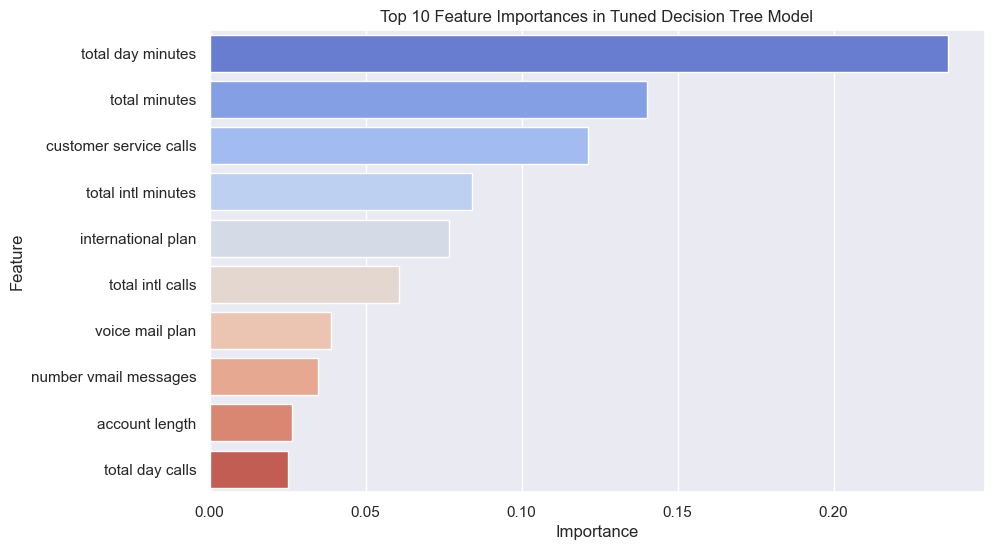

In [ ]:

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Specify the number of top features to display
top_n = 10  # Number of top features to display

# Get the top n features
top_features = importance_df.head(top_n)

# Visualize the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='coolwarm')
plt.title(f'Top {top_n} Feature Importances in Tuned Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###Conclusion

Tree-based models performed well on your dataset, while Knn and Logistic regression produced unsatisfactory results despite extensive hyperparameter tuning. Feature engineering and changing the threshold for Logistic regression were the only factors that could somewhat improve the performance of Knn and Logistic regression. Neural networks demonstrated slightly lower performance than Tree-based models but still managed to achieve great results. Bagging Logistic regression fell behind Tree-based models and Neural network but still outperformed default Logistic regression and Knn by a significant margin.

Based on the search results, here are some recommendations for the international plan, customer service calls, and total day minutes:

International Plan: Consider adding an international plan if you are traveling to countries covered by TravelPass or other similar plans. These plans allow you to use your phone's apps, texting, maps, and other features while abroad without worrying about additional costs.For longer trips, you may want to consider an international monthly plan that includes a higher data allowance.

Customer Service Calls: High numbers of customer service calls could indicate dissatisfaction, and it's essential to address these issues promptly to prevent churn. Implementing customer service improvements, such as better call handling, agent training, and addressing common customer pain points, can help reduce churn.

Total Day Minutes: Higher usage of daytime minutes is associated with an increased likelihood of churning. Investigate the reasons behind high daytime usage and address any underlying issues, such as network coverage or service quality, to improve customer satisfaction and retention.

Future Investigations

Further exploration is recommended to understand additional characteristics influencing churn and enhance predictive models for better accuracy. This may include analyzing customer demographics, usage patterns, and other relevant factors.